<a href="https://colab.research.google.com/github/dnjhaha/AML/blob/master/AMLASSIGN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Danni Jin AML Spring 2020 assignment #3
**Setup First,Importing the Required Libraries**

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
# Common imports
import numpy as np
import os
# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from keras.utils import np_utils
from keras.datasets import cifar10
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

**Preparing the dataset: Load the cifar10 data from Keras. Setup train and test splits. Keras library already consists of all the standard datasets. So, we are just importing cifar10 from the library itself. Then, we use the load_data() method to load the data into the given train and test directories.**

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train.shape:', X_train.shape)
print(X_train.shape[0], 'train_samples')
print(X_test.shape[0], 'test_samples')

X_train.shape: (50000, 32, 32, 3)
50000 train_samples
10000 test_samples


**Normalize the data**

In [0]:
#from sklearn.preprocessing import label_binarize
X_train=X_train.reshape(X_train.shape[0],32*32*3).astype('float32')
X_test=X_test.reshape(X_test.shape[0],32*32*3).astype('float32')
#y_train = label_binarize(y_train, classes=[0,1,2,3,4,5,6,7,8,9])
#y_test = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9])
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])
#y_train = np_utils.to_categorical(y_train) 
#y_test = np_utils.to_categorical(y_test) 
X_train=X_train/255
X_test=X_test/255


In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 3072) (50000,)
(10000, 3072) (10000,)


**ROC response of dataset, created from K-fold cross-validation. Taking all of these curves, it is possible to calculate the mean area under curve, and see the variance of the curve when the training set is split into different subsets. This roughly shows how the classifier output is affected by changes in the training data, and how different the splits generated by K-fold cross-validation are from one another.**
# Taking forever.

In [0]:
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=4)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    classifier.fit(X_train, y_train)
    viz = plot_roc_curve(classifier, X_test, y_test,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

# Train a SVM classifier on the dataset , then evaluate the resulting model on the test set.For large datasets consider using sklearn.svm.LinearSVC or sklearn.linear_model.SGDClassifier instead。The multiclass support is handled according to a one-vs-one scheme.

In [5]:
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [6]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=5,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=42, shuffle=True,
                                           tol=-inf, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   n_jobs=None)

**one-versus-one
(OvO) strategy. If there are N classes, you need to train N × (N – 1) / 2 classifiers.**

In [8]:
len(ovo_clf.estimators_)

45

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(ovo_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.30473391, 0.33791324, 0.36325453])

**use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.**

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)#the explained variance:95% is an elbow where it stops growing fast.
X_train_reduced = pca.fit_transform(X_train)

In [11]:
ovo_clf.fit(X_train_reduced, y_train)
X_test_reduced = pca.transform(X_test)
y_pred = ovo_clf.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.3482

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced.astype(np.float64))
cross_val_score(ovo_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.33935321, 0.34337313, 0.3475339 ])

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.26675466490670185
0.2622547549049019
0.30865234609384373


In [0]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(ovo_clf, X_train_scaled, y_train, cv=3)

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[1812,  346,  306,  274,  149,  224,  118,  374,  931,  466],
       [ 259, 2028,  177,  229,  146,  194,  230,  300,  356, 1081],
       [ 368,  269, 1053,  530,  566,  509,  691,  570,  286,  158],
       [ 228,  364,  402, 1247,  306,  931,  618,  358,  228,  318],
       [ 250,  152,  655,  444, 1196,  497,  765,  720,  144,  177],
       [ 206,  284,  456,  991,  405, 1326,  494,  453,  203,  182],
       [  88,  218,  390,  788,  478,  513, 1919,  332,   94,  180],
       [ 240,  287,  365,  380,  416,  426,  275, 2083,  119,  409],
       [ 845,  488,  135,  201,   78,  188,   62,  113, 2260,  630],
       [ 377,  932,  131,  172,  126,  139,  192,  324,  360, 2247]])

In [0]:
y_train_perfect_predictions = y_train

In [17]:
confusion_matrix(y_train, y_train_perfect_predictions)

array([[5000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 5000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 5000,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 5000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5000,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 5000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 5000,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5000]])

In [18]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred,average='weighted')

0.340482672500912

In [19]:
recall_score(y_train, y_train_pred,average='weighted')

0.34342

In [20]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred,average='weighted')

0.3407102349785773

In [21]:
#from sklearn.model_selection import cross_val_predict
#y_scores = cross_val_predict(ovo_clf, X_train_scaled, y_train, cv=3,method="decision_function")
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred, labels=[0,1,2,3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           0       0.39      0.36      0.37      5000
           1       0.38      0.41      0.39      5000
           2       0.26      0.21      0.23      5000
           3       0.24      0.25      0.24      5000
           4       0.31      0.24      0.27      5000
           5       0.27      0.27      0.27      5000
           6       0.36      0.38      0.37      5000
           7       0.37      0.42      0.39      5000
           8       0.45      0.45      0.45      5000
           9       0.38      0.45      0.41      5000

    accuracy                           0.34     50000
   macro avg       0.34      0.34      0.34     50000
weighted avg       0.34      0.34      0.34     50000



In [0]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

In [0]:
true = np.random.randint(0, 10, size=100)
pred = np.random.randint(0, 10, size=100)
labels = np.arange(10)
target_names = list("0123456789")
clf_report = classification_report(y_train, y_train_pred,
                                   labels=labels,
                                   target_names=target_names,
                                   output_dict=True)

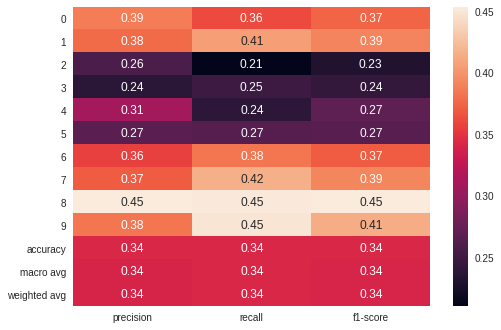

In [44]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [0]:
y_scores = cross_val_predict(ovo_clf, X_train, y_train, cv=3,method="decision_function")

In [0]:
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

**svm**

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

**Compute the average precision score**

In [0]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [0]:
# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

# Random Forest Classifier:36.11

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MinMaxScaler
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train=X_train.reshape(X_train.shape[0],32*32*3).astype('float32')
X_test=X_test.reshape(X_test.shape[0],32*32*3).astype('float32')
X_train = X_train / 255.0 
X_test = X_test / 255.0 
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])


# Scale the data.

In [0]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
forest_clf.fit(X_train, y_train)
y_pred=forest_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.3611

**After i scale the data, KNN still takes a lot if time.**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

# after PCA ,Random Forest accuracy is 27.81

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)#the explained variance:95% is an elbow where it stops growing fast.
X_train_reduced = pca.fit_transform(X_train)
rnd_clf2 = RandomForestClassifier(n_estimators=10, random_state=42)
rnd_clf2.fit(X_train_reduced, y_train)
X_test_reduced = pca.transform(X_test)
y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.2781

**ROC curve** 

In [0]:
from sklearn.metrics import roc_curve, auc
#y_pred = lr.predict_proba(X_test)
#print(roc_auc_score(y_test, y_pred))
# y_score = lr_one_rest.predict_proba(X_test)
y_score = rnd_clf2.predict_proba(X_test_reduced)

In [41]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.34895302, 0.34361313, 0.34177367])

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(forest_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.350093  , 0.34331313, 0.34135365])

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(forest_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx


array([[2574,  353,  367,  182,  170,  138,  127,  151,  677,  261],
       [ 462, 2186,  263,  278,  181,  213,  174,  178,  367,  698],
       [ 672,  303, 1387,  470,  764,  358,  489,  291,  134,  132],
       [ 402,  429,  673, 1151,  466,  781,  507,  263,  129,  199],
       [ 411,  263,  964,  447, 1493,  298,  558,  325,  125,  116],
       [ 350,  379,  684,  947,  450, 1345,  376,  279,   92,   98],
       [ 220,  369,  792,  602,  705,  356, 1632,  180,   53,   91],
       [ 444,  399,  540,  515,  604,  408,  288, 1397,  118,  287],
       [ 905,  537,  219,  223,  138,  160,   78,  119, 2319,  302],
       [ 512, 1136,  208,  265,  138,  151,  150,  261,  417, 1762]])

In [0]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure confusion_matrix_plot


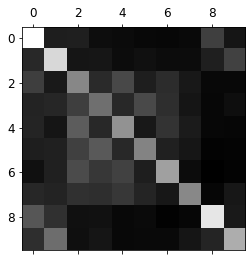

In [0]:

plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [0]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Saving figure confusion_matrix_errors_plot


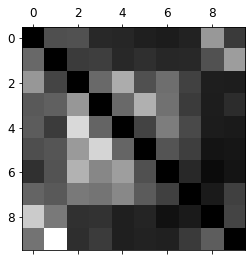

In [0]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

In [0]:
if y_score.ndim == 2:
    y_score = y_score[:, 1]

In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# ROC curves

In [0]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

# conclusion: I use the KNN SVM(taking forever,no result),SGD and RF's accuracy is almost the same. by the precision and recall score, picture 8 can recognize well.